In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from LinearDiscriminantAnalysis import LDA_implemented
from NaiveBayes import NB_clf

from tqdm import tqdm

In [2]:

train_data = np.load("data/fashion_train.npy")
X_train, y_train = train_data[:,:784], train_data[:,-1]

test_data = np.load("data/fashion_test.npy")
X_test, y_test = test_data[:,:784], test_data[:,-1]

N_CLASSES = len(np.unique(y_train))
CLOTHING_TYPES = {0: "T-shirt/top", 
                  1: "Trouser",
                  2: "Pullover",
                  3: "Dress",
                  4: "Shirt"}


In [3]:
# PCA 

num_components = 6
pca = PCA(n_components=num_components)

# Standardizing each feature to have mean 0 and variance 1 both for the training and test set
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Fitting the PCA model on the training data and transform it
PCA_X_train = pca.fit_transform(X_train_standardized)
PCA_X_test = pca.transform(X_test_standardized)

In [4]:
# LDA
lda = LDA_implemented(N_CLASSES-1)
LDA_X_train = lda.fit_transform(X_train, y_train)
LDA_X_test = lda.transform(X_test)

LDA succesfully fitted and tranformed


In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1, figsize=(10,5))

# Courseness of contourplot.  
h = 0.1

x_min, x_max = np.min(LDA_X_train[:,0])-1, np.max(LDA_X_train[:,0]) + 1
y_min, y_max = np.min(LDA_X_train[:,1])-1, np.max(LDA_X_train[:,1]) + 1

xx,yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Z = nbclf_chosen.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx,yy, Z)

scatter = ax.scatter(LDA_X_train[:,0],LDA_X_train[:,1], c=y_train, marker='o', edgecolor='black')

ax.set_xlim(xx.min(), xx.max());
ax.set_ylim(yy.min(), yy.max());
ax.set_title(f"Naive Bayes with bandwidth = 0.6");
legend_labels = [f"{CLOTHING_TYPES[i]}" for i in range(len(CLOTHING_TYPES))]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right')

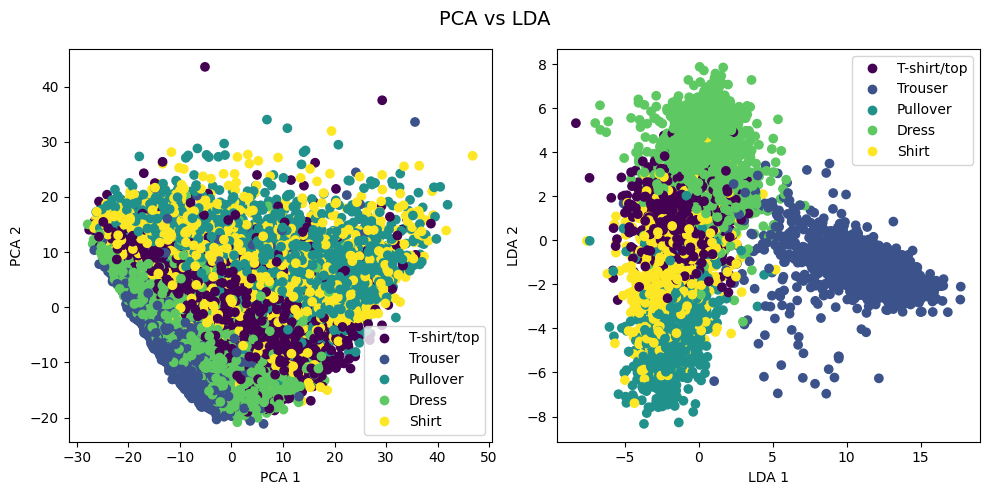

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
legend_labels = [f"{CLOTHING_TYPES[i]}" for i in range(len(CLOTHING_TYPES))]
scatter1 = ax[0].scatter(PCA_X_train[:,0], PCA_X_train[:,1], c=y_train)
scatter2 = ax[1].scatter(LDA_X_train[:,0], LDA_X_train[:,1], c=y_train)
ax[0].legend(handles=scatter1.legend_elements()[0], labels=legend_labels, loc='lower right')
ax[1].legend(handles=scatter2.legend_elements()[0], labels=legend_labels, loc='upper right')
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")
ax[1].set_xlabel("LDA 1")
ax[1].set_ylabel("LDA 2")
fig.suptitle("PCA vs LDA", fontsize=14);
fig.tight_layout()

In [14]:
svm_PCA1 = SVC(kernel='linear', C=1)
svm_PCA1.fit(PCA_X_train[:,:2], y_train)
SVM_PCA1_y_pred = svm_PCA1.predict(PCA_X_test[:,:2])

svm_LDA1 = SVC(kernel='linear', C=1)
svm_LDA1.fit(LDA_X_train[:,:2], y_train)
SVM_LDA1_y_pred = svm_LDA1.predict(LDA_X_test[:,:2])

svm_PCA2 = SVC(kernel='linear', C=1)
svm_PCA2.fit(PCA_X_train, y_train)
SVM_PCA2_y_pred = svm_PCA2.predict(PCA_X_test)

svm_LDA2 = SVC(kernel='linear', C=1)
svm_LDA2.fit(LDA_X_train, y_train)
SVM_LDA2_y_pred = svm_LDA2.predict(LDA_X_test)


print("SVM on PCA, 2 dim:", f1_score(y_test, SVM_PCA1_y_pred, average="macro"))
print("SVM on LDA, 2 dim:", f1_score(y_test, SVM_LDA1_y_pred, average="macro"))
print("SVM on PCA, 6 dim:", f1_score(y_test, SVM_PCA2_y_pred, average="macro"))
print("SVM on LDA, 4 dim:", f1_score(y_test, SVM_LDA2_y_pred, average="macro"))


SVM on PCA, 2 dim: 0.5696520231047715
SVM on LDA, 2 dim: 0.7276287578613739
SVM on PCA, 6 dim: 0.7227212780114607
SVM on LDA, 4 dim: 0.809718944349453


In [15]:
# computing the micro F1-scores for each class for SVM
print('Classification report for SVM using the 2 first PCAs:')
print(classification_report(y_true=y_test, y_pred=SVM_PCA1_y_pred, target_names=CLOTHING_TYPES.values()))
print('Classification report for SVM using the 2 first LDAs:')
print(classification_report(y_true=y_test, y_pred=SVM_LDA1_y_pred, target_names=CLOTHING_TYPES.values()))

Classification report for SVM using the 2 first PCAs:
              precision    recall  f1-score   support

 T-shirt/top       0.56      0.69      0.61      1000
     Trouser       0.71      0.81      0.76      1000
    Pullover       0.56      0.64      0.60      1000
       Dress       0.60      0.46      0.52      1000
       Shirt       0.42      0.31      0.36      1000

    accuracy                           0.58      5000
   macro avg       0.57      0.58      0.57      5000
weighted avg       0.57      0.58      0.57      5000

Classification report for SVM using the 2 first LDAs:
              precision    recall  f1-score   support

 T-shirt/top       0.59      0.74      0.66      1000
     Trouser       0.98      0.95      0.96      1000
    Pullover       0.72      0.78      0.75      1000
       Dress       0.81      0.80      0.80      1000
       Shirt       0.56      0.40      0.47      1000

    accuracy                           0.73      5000
   macro avg       0.73

In [12]:
nb_PCA1 = NB_clf(0.6)
nb_PCA1.fit(PCA_X_train[:,:2], y_train)
NB_PCA1_y_pred = nb_PCA1.predict(PCA_X_test[:,:2])

nb_LDA1 = NB_clf(0.6)
nb_LDA1.fit(LDA_X_train[:,:2], y_train)
NB_LDA1_y_pred = nb_LDA1.predict(LDA_X_test[:,:2])

nb_PCA2 = NB_clf(0.6)
nb_PCA2.fit(PCA_X_train[:,:], y_train)
NB_PCA2_y_pred = nb_PCA2.predict(PCA_X_test[:,:])

nb_LDA2 = NB_clf(0.6)
nb_LDA2.fit(LDA_X_train[:,:], y_train)
NB_LDA2_y_pred = nb_LDA2.predict(LDA_X_test[:,:])

print("NB on PCA, 2 dim:", f1_score(y_test, NB_PCA1_y_pred, average="macro"))
print("NB on LDA, 2 dim:", f1_score(y_test, NB_LDA1_y_pred, average="macro"))
print("NB on PCA, 6 dim:", f1_score(y_test, NB_PCA2_y_pred, average="macro"))
print("NB on LDA, 4 dim:", f1_score(y_test, NB_LDA2_y_pred, average="macro"))

NB on PCA, 2 dim: 0.5076282530197032
NB on LDA, 2 dim: 0.7167324243145808
NB on PCA, 6 dim: 0.6977798363403879
NB on LDA, 4 dim: 0.7998845700556109


In [13]:
# computing the micro F1-scores for each class for Naive Bayes
print('Classification report for NB using the 2 first PCAs:')
print(classification_report(y_true=y_test, y_pred=NB_PCA1_y_pred, target_names=CLOTHING_TYPES.values()))
print('Classification report for NB using the 2 first LDAs:')
print(classification_report(y_true=y_test, y_pred=NB_LDA1_y_pred, target_names=CLOTHING_TYPES.values()))

Classification report for NB using the 2 first PCAs:
              precision    recall  f1-score   support

 T-shirt/top       0.54      0.47      0.50      1000
     Trouser       0.62      0.82      0.71      1000
    Pullover       0.57      0.54      0.56      1000
       Dress       0.47      0.36      0.41      1000
       Shirt       0.35      0.38      0.36      1000

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.51      0.51      0.51      5000

Classification report for NB using the 2 first LDAs:
              precision    recall  f1-score   support

 T-shirt/top       0.58      0.77      0.66      1000
     Trouser       0.98      0.95      0.96      1000
    Pullover       0.71      0.79      0.75      1000
       Dress       0.81      0.79      0.80      1000
       Shirt       0.54      0.33      0.41      1000

    accuracy                           0.73      5000
   macro avg       0.72  